# sklearn回归分析

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 读取数据
data = np.loadtxt('/Users/jing/Downloads/python_book/chapter4/regression.txt')
# 分割自变量和因变量
X = data[:, :-1]
y = data[:, -1]

# 训练回归模型
n_folds = 6 # 交叉检验次数
lr = LinearRegression() # 线性回归
svr = SVR() # 支持向量机回归
gbr = GradientBoostingRegressor() # GBDT回归
xgb = XGBRegressor() # xgboost回归
mnames = ['LinearRegression', 'SVR', 'GradientBoostingRegressor', 'xgboost'] # 回归模型名称列表
mlist = [lr, svr, gbr, xgb] # 回归模型对象列表
cv_scores = [] # 交叉检验结果列表
y_pred = [] # 回归模型预测y值列表

for model in mlist:
    scores = cross_val_score(model, X, y, cv=n_folds) # 将每个回归模型导入交叉检验
    predicted = model.fit(X, y).predict(X) # 回归训练得到预测y值
    cv_scores.append(scores) # 将交叉验证结果存入列表
    y_pred.append(predicted) # 将回归训练中得到的预测y值存入列表

# 模型效果评估
n_samples, n_features = X.shape # 总样本数， 总特征数
metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score] # 回归评估指标对象集
metrics_list = [] # 回归评估指标列表

for i in range(len(mlist)):
    tmp = [] # 每个内循环的临时结果列表
    for m in metrics_name:
        score = m(y, y_pred[i]) # 计算每个回归指标结果
        tmp.append(score)
    metrics_list.append(tmp)

df1 = pd.DataFrame(cv_scores, index=mnames) # 交叉验证数据框
df2 = pd.DataFrame(metrics_list, index=mnames, columns=['ev', 'mae', 'mse', 'r2']) # 回归指标数据框

/Users/jing/.virtualenvs/pydata/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [2]:
df1

,0,1,2,3,4,5
LinearRegression,0.642240,0.611521,0.514471,0.785033,-0.143673,-0.015390
SVR,-0.000799,-0.004447,-1.224386,-0.663773,-0.122252,-1.374062
GradientBoostingRegressor,0.750811,0.810296,0.768418,0.866546,0.378502,0.550021
xgboost,0.767085,0.823594,0.749427,0.856800,0.381584,0.552490


In [3]:
df2

,ev,mae,mse,r2
LinearRegression,0.740608,3.272945,21.897779,0.740608
SVR,0.173548,5.447960,71.637552,0.151410
GradientBoostingRegressor,0.975126,1.151773,2.099835,0.975126
xgboost,0.972867,1.170705,2.290595,0.972867


In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


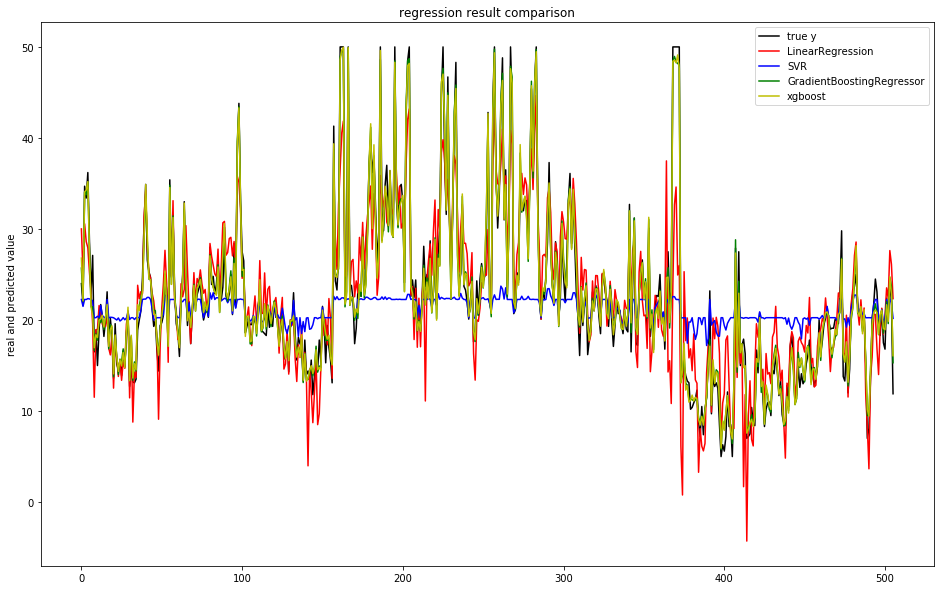

In [6]:
# 模型效果可视化
plt.figure(figsize=(16, 10))  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(y_pred):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), y_pred[i], color_list[i], label=mnames[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像